## Ensemble Learning

To know more about Ensemble Learning Refer https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

### Data : Iris

In [1]:
import pandas as pd

df = pd.read_csv('Iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])
print(df)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0             5.1           3.5            1.4           0.2      Iris-setosa
1             4.9           3.0            1.4           0.2      Iris-setosa
2             4.7           3.2            1.3           0.2      Iris-setosa
3             4.6           3.1            1.5           0.2      Iris-setosa
4             5.0           3.6            1.4           0.2      Iris-setosa
..            ...           ...            ...           ...              ...
95            5.7           3.0            4.2           1.2  Iris-versicolor
96            5.7           2.9            4.2           1.3  Iris-versicolor
97            6.2           2.9            4.3           1.3  Iris-versicolor
98            5.1           2.5            3.0           1.1  Iris-versicolor
99            5.7           2.8            4.1           1.3  Iris-versicolor

[100 rows x 5 columns]


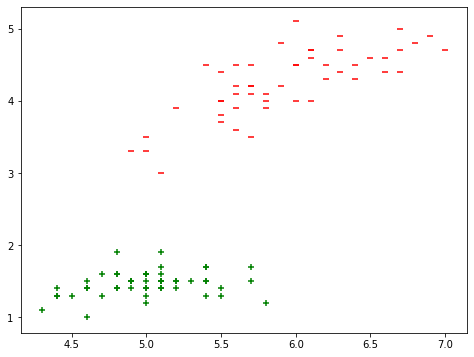

In [2]:
import matplotlib.pyplot as plt

x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [3]:
df = df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)

In [4]:
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(0)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()

In [5]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

X, Y = shuffle(X,Y)

x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [6]:
y_train = y_train.reshape(90,1)

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)


C:\Users\risha\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [8]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

C:\Users\risha\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


1.0

In [9]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)


C:\Users\risha\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\risha\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [10]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9999999699958083

## Clustering

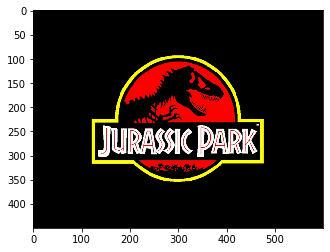

In [17]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
image = cv2.imread("jp.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# show our image
plt.figure()
plt.imshow(image)

In [18]:
# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [19]:
clt = KMeans(n_clusters = 10)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
# import the necessary packages
import numpy as np
import cv2
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, index) = np.histogram(clt.labels_, bins = numLabels)
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
	# return the histogram
	return hist

In [21]:
def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

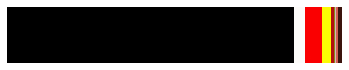

In [22]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()